In [1]:
# Importação das bibliotecas necessárias
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import pandas as pd
from IPython.display import Image
from sklearn.datasets import load_iris
import pydot
import graphviz
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source   
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt


In [44]:

# Criando dados aleatórios
np.random.seed(42)  # Para tornar os resultados reproduzíveis
idades = np.random.randint(10, 90, 1000000)
rendas = np.random.randint(1000, 500000, 1000000)
tipos_plano = np.random.choice(['A', 'B', 'C'], size=1000000)
segmentos = np.random.choice(['Jovem', 'Média Idade'], size=1000000)
cidades = np.random.choice(['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Porto Alegre', 'Salvador','Juiz de Fora','Vila Velha'], size=1000000)
escolaridade = np.random.choice(['Ensino Médio', 'Graduação', 'Pós-Graduação', 'Mestrado', 'Doutorado'], size=1000000)
profissoes = np.random.choice(['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Programador'], size=1000000)
sexo = np.random.choice(['Masculino', 'Feminino'], size=1000000)

# Criando o DataFrame
clientes = pd.DataFrame({
    'Idade': idades,
    'Renda': rendas,
    'Tipo_Plano': tipos_plano,
    'Segmento': segmentos,
    'Cidade': cidades,
    'Escolaridade': escolaridade,
    'Profissão': profissoes,
    'Sexo': sexo
})


In [45]:

# Verificando os tamanhos dos arrays
print(len(idades), len(rendas), len(tipos_plano), len(segmentos), len(cidades), len(escolaridade), len(profissoes), len(sexo))


1000000 1000000 1000000 1000000 1000000 1000000 1000000 1000000


In [46]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   Idade         1000000 non-null  int32 
 1   Renda         1000000 non-null  int32 
 2   Tipo_Plano    1000000 non-null  object
 3   Segmento      1000000 non-null  object
 4   Cidade        1000000 non-null  object
 5   Escolaridade  1000000 non-null  object
 6   Profissão     1000000 non-null  object
 7   Sexo          1000000 non-null  object
dtypes: int32(2), object(6)
memory usage: 53.4+ MB


In [64]:
clientes.head()


,Idade,Renda,Tipo_Plano,Segmento,Cidade,Escolaridade,Profissão,Sexo
0,61,250604,B,Média Idade,Belo Horizonte,Doutorado,Programador,Feminino
1,24,53716,B,Jovem,Porto Alegre,Ensino Médio,Programador,Masculino
2,81,111528,B,Jovem,Rio de Janeiro,Pós-Graduação,Médico,Masculino
3,70,95707,B,Média Idade,Salvador,Doutorado,Professor,Feminino
4,30,333959,A,Média Idade,Porto Alegre,Ensino Médio,Programador,Masculino


In [65]:
# Dividindo os dados em features (X) e target (y)
X = clientes.drop(columns=['Tipo_Plano','Segmento','Cidade','Escolaridade','Profissão','Sexo'])
y = clientes['Tipo_Plano']

In [66]:
# Convertendo variáveis categóricas em numéricas
X = pd.get_dummies(X)

In [67]:
X.head()

,Idade,Renda
0,61,250604
1,24,53716
2,81,111528
3,70,95707
4,30,333959


In [68]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
# Instanciando o objeto classificador
clf = DecisionTreeClassifier()

# Treinando o modelo de árvore de decisão
clf = clf.fit(X_train, y_train)

In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700000 entries, 506532 to 121958
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Idade   700000 non-null  int32
 1   Renda   700000 non-null  int32
dtypes: int32(2)
memory usage: 10.7 MB


In [71]:
# Verificando as features mais importantes para o modelo de árvore de decisão treinado
feature_importance = clf.feature_importances_
for feature, importance in zip(X.columns, feature_importance):
    print("{}:{}".format(feature, importance))

Idade:0.2036993736351969
Renda:0.7963006263648031


In [72]:
# Executando o algoritmo de árvore de decisão com o conjunto de teste
resultado = clf.predict(X_test)

In [73]:
resultado

array(['C', 'A', 'B', ..., 'B', 'A', 'A'], dtype=object)

In [75]:
# Testando com uma nova amostra
nova_amostra = pd.DataFrame([[25, 50000]],columns=X.columns[:2])
resultado_nova_amostra = clf.predict(nova_amostra)
probabilidade_nova_amostra = clf.predict_proba(nova_amostra)

In [76]:
probabilidade_nova_amostra

array([[0., 0., 1.]])

In [77]:
# Métricas de Validação
print(metrics.classification_report(y_test, resultado))

              precision    recall  f1-score   support

           A       0.33      0.34      0.34     99595
           B       0.33      0.33      0.33    100013
           C       0.34      0.33      0.33    100392

    accuracy                           0.33    300000
   macro avg       0.33      0.33      0.33    300000
weighted avg       0.33      0.33      0.33    300000



In [78]:
# Visualizando a árvore de decisão
#dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=clf.classes_, filled=True, rounded=True, special_characters=True)
#graph = graphviz.Source(dot_data)
#graph

In [79]:

# Visualizando as fronteiras criadas pela árvore
def visualize_fronteiras(msamples_split):
    clf = DecisionTreeClassifier(min_samples_split=msamples_split)
    tree = clf.fit(X.values[:, :2], y)

    plt.figure(figsize=(8,5))
    plot_decision_regions(X.values[:, :2], y.values, clf=tree, legend=2)

    plt.xlabel('Idade')
    plt.ylabel('Renda')
    plt.title('Decision Tree on Customer Data')
    plt.show()


In [80]:

y = y.map({'A': 0, 'B': 1, 'C': 2}).astype(int)


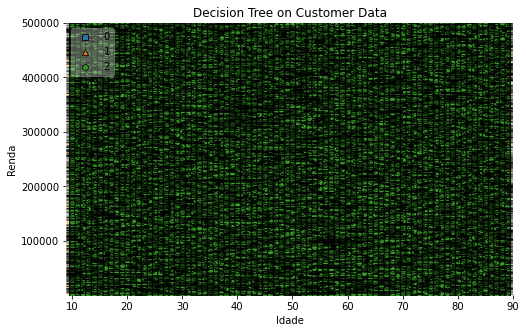

In [81]:

visualize_fronteiras(2)


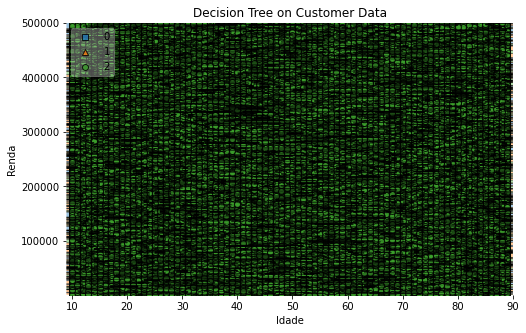

In [82]:
visualize_fronteiras(10)

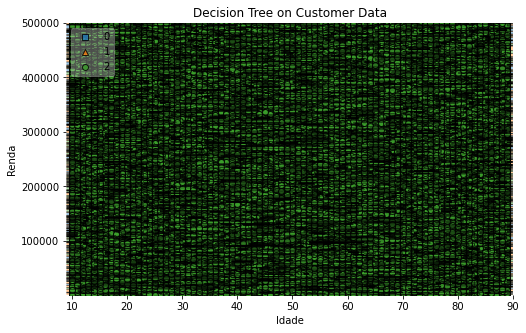

In [83]:
visualize_fronteiras(20)

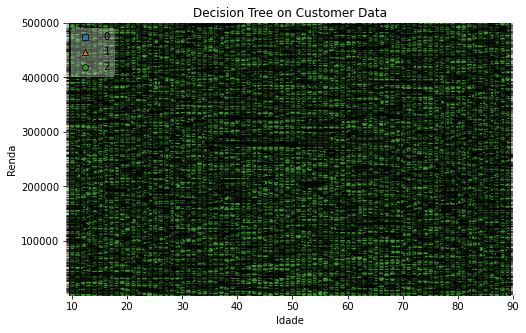

In [84]:
visualize_fronteiras(50)